In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier  
from prettytable import PrettyTable
from sklearn import tree
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119782 entries, 0 to 119781
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   m_id                          119782 non-null  object 
 1   syst_direct_ipo_rate          119782 non-null  float64
 2   syst_buffered_ipo_rate        119782 non-null  float64
 3   syst_page_fault_rate          119782 non-null  float64
 4   syst_page_read_ipo_rate       119782 non-null  float64
 5   syst_process_count            119782 non-null  int64  
 6   syst_other_states             119782 non-null  int64  
 7   page_page_write_ipo_rate      119782 non-null  float64
 8   page_global_valid_fault_rate  119782 non-null  float64
 9   page_free_list_size           119782 non-null  int64  
 10  page_modified_list_size       119782 non-null  int64  
 11  io_mailbox_write_rate         119782 non-null  float64
 12  io_split_transfer_rate        119782 non-nul

In [4]:
data = pd.read_csv('train.csv')
print(data.shape)
print(data.columns)

(119782, 88)
Index(['m_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_

In [5]:


def plot_confugion_matrix(target, predict):
    
    cm = confusion_matrix(predict, target)
    class_label = ['low']
    plt.figure(figsize = (7,7))
    df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Confusiion Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()


In [6]:
def one_hot_builder(label_dict, test_label):
    y_test_on_hot = []
    for test in test_label:
        y_test_on_hot.append(label_dict[str(test)])
    return y_test_on_hot


# EDA

In [7]:
data.columns

Index(['m_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts',
    

In [8]:
data.shape

(119782, 88)

In [9]:
data.columns[data.nunique() <= 1]

Index(['app06_dirio', 'app06_bufio', 'app06_pgflts', 'app06_proccount',
       'app03_proccount'],
      dtype='object')

In [10]:
# data = data.drop(['app06_dirio', 'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app03_proccount'], axis = 1)

In [11]:
print(data.shape)

(119782, 88)


In [12]:
# mid_dict = {'a':[1, 0,0,0,0,0,0], 'b':[0, 1,0,0,0,0,0], 'c':[0, 0,1,0,0,0,0], 'd':[0, 0,0,1,0,0,0], 'e':[0, 0,0,0,1,0,0], 'f':[0, 0,0,0,0,1,0], 'g':[0, 0,0,0,0,0,1]}
# m_id_one_hot = one_hot_builder(mid_dict, data.m_id.values)

In [13]:
# data['m_id_one_hot'] = m_id_one_hot

data = data.drop(['m_id'], axis = 1)

In [14]:
correlation_matrix = data.corr()
correlated_features = set()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.99:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
len(correlated_features)

12

In [16]:
correlated_features

{'app01_bufio',
 'app01_pagesgbl',
 'app01_pagesproc',
 'app03_pagesgbl',
 'app03_pagesproc',
 'app04_pagesproc',
 'app05_pagesproc',
 'app08_pagesgbl',
 'app08_pagesproc',
 'io_page_reads',
 'llb0_pkts_sentpsec',
 'tcp_retxto'}

In [17]:
# data = data.drop(list(correlated_features), axis = 1)

In [18]:
data.shape

(119782, 87)

### Distributions analysis of columns with respect to data and check for outliers

In [19]:
cols = []
for col in data.columns:
    if np.unique(data[col].values).shape[0] > 30:
        cols.append(col)
        
print(len(cols))
cols

61


['syst_direct_ipo_rate',
 'syst_buffered_ipo_rate',
 'syst_page_fault_rate',
 'syst_page_read_ipo_rate',
 'syst_process_count',
 'page_page_write_ipo_rate',
 'page_global_valid_fault_rate',
 'page_free_list_size',
 'page_modified_list_size',
 'io_mailbox_write_rate',
 'io_split_transfer_rate',
 'io_file_open_rate',
 'io_logical_name_trans',
 'io_page_reads',
 'io_page_writes',
 'page_free_list_faults',
 'page_modified_list_faults',
 'page_demand_zero_faults',
 'state_lef',
 'app07_dirio',
 'app07_bufio',
 'app07_pgflts',
 'app07_pagesgbl',
 'app07_pagesproc',
 'app04_dirio',
 'app04_bufio',
 'app04_pgflts',
 'app04_pagesgbl',
 'app04_pagesproc',
 'app08_dirio',
 'app08_bufio',
 'app08_pagesgbl',
 'app08_pagesproc',
 'app01_dirio',
 'app01_bufio',
 'app01_pagesproc',
 'app05_dirio',
 'app05_bufio',
 'app05_pgflts',
 'app05_pagesgbl',
 'app05_pagesproc',
 'app03_dirio',
 'app03_bufio',
 'app03_pgflts',
 'app03_pagesproc',
 'app02_dirio',
 'app02_bufio',
 'app02_pagesgbl',
 'app02_pagespr

##### syst_page_fault_rate analyze

<AxesSubplot:xlabel='syst_page_fault_rate', ylabel='syst_page_fault_rate'>

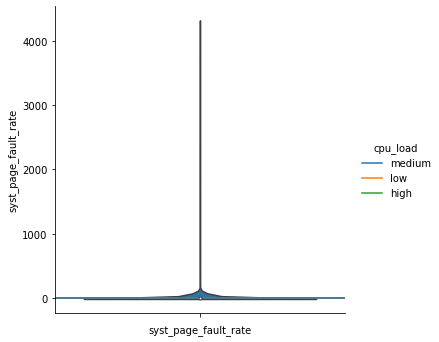

In [20]:
sns.displot(data, x="syst_page_fault_rate", hue="cpu_load", kind="kde")
sns.violinplot(y="syst_page_fault_rate", data =data)

there are some outliers in the column

In [21]:
for i in range(90,100):
    var =data["syst_page_fault_rate"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 1.4
91 percentile value is 4.45
92 percentile value is 9.3
93 percentile value is 14.95
94 percentile value is 15.28
95 percentile value is 15.83
96 percentile value is 23.78
97 percentile value is 32.35
98 percentile value is 62.92
99 percentile value is 90.02
100 percentile value is  4305.72


In [22]:
var =data["syst_page_fault_rate"].values
var = np.sort(var,axis = None)
print(var[-300:])

[ 812.03  813.45  814.77  817.    817.88  824.9   825.55  825.55  826.07
  826.5   826.53  827.12  827.27  830.68  831.23  831.43  831.43  831.57
  831.68  832.    832.15  832.33  832.53  832.55  832.77  832.98  832.98
  833.35  833.38  833.62  836.58  841.77  842.33  843.33  851.08  861.92
  864.97  871.77  872.33  873.42  877.32  881.67  884.67  890.7   891.05
  899.35  903.22  908.38  910.67  911.55  917.37  919.7   921.93  927.17
  932.6   943.33  949.82  955.62  955.67  959.55  961.67  966.5   970.73
  970.9   980.22  987.03  989.75  989.98  991.22  991.43  999.87 1002.65
 1019.97 1021.22 1038.02 1039.87 1040.47 1043.4  1047.37 1048.18 1054.45
 1056.98 1057.9  1061.87 1065.92 1073.53 1074.28 1074.88 1076.47 1081.05
 1088.17 1091.15 1091.18 1091.58 1100.42 1103.95 1105.45 1107.7  1108.02
 1109.82 1110.82 1112.28 1118.83 1126.73 1128.35 1138.35 1140.95 1140.98
 1142.05 1143.4  1143.47 1143.83 1146.05 1152.22 1152.35 1153.2  1157.32
 1157.4  1160.77 1162.05 1165.25 1166.98 1174.53 11

In [23]:
data = data[data['syst_page_fault_rate'] < 2600]
data.shape

(119779, 87)

##### page_page_write_ipo_rate analyze

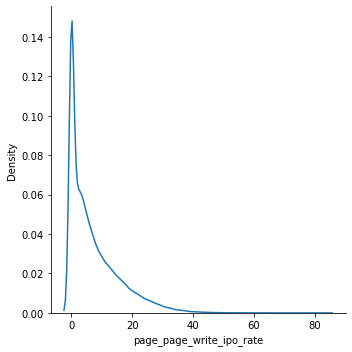

In [24]:
sns.displot(data, x="page_page_write_ipo_rate", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)

In [25]:
for i in range(90,100):
    var =data["page_page_write_ipo_rate"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 19.12
91 percentile value is 19.98
92 percentile value is 20.9
93 percentile value is 21.92
94 percentile value is 23.03
95 percentile value is 24.35
96 percentile value is 25.87
97 percentile value is 27.67
98 percentile value is 30.08
99 percentile value is 34.05
100 percentile value is  83.33


In [26]:
var =data["page_page_write_ipo_rate"].values
var = np.sort(var,axis = None)
print(var[-300:])

[41.55 41.6  41.6  41.63 41.63 41.65 41.68 41.68 41.68 41.68 41.73 41.75
 41.83 41.85 41.87 41.9  41.9  41.92 41.93 41.93 41.95 41.97 42.03 42.03
 42.07 42.08 42.1  42.13 42.15 42.17 42.2  42.22 42.23 42.23 42.25 42.27
 42.33 42.38 42.43 42.45 42.45 42.47 42.47 42.47 42.48 42.52 42.58 42.6
 42.67 42.7  42.7  42.72 42.73 42.73 42.78 42.83 42.85 42.85 42.87 42.92
 42.93 42.95 42.97 42.97 42.97 43.   43.03 43.07 43.1  43.1  43.15 43.15
 43.17 43.18 43.2  43.2  43.23 43.25 43.27 43.28 43.28 43.32 43.37 43.42
 43.45 43.47 43.52 43.52 43.52 43.52 43.52 43.52 43.6  43.6  43.65 43.68
 43.68 43.77 43.77 43.82 43.83 43.83 43.85 43.85 43.92 43.93 43.93 44.
 44.   44.   44.07 44.07 44.08 44.12 44.17 44.18 44.18 44.22 44.25 44.27
 44.28 44.3  44.33 44.33 44.35 44.37 44.38 44.45 44.5  44.53 44.53 44.53
 44.53 44.57 44.62 44.62 44.62 44.62 44.7  44.75 44.83 44.88 44.9  44.9
 44.92 44.93 44.95 44.97 44.98 45.   45.1  45.1  45.13 45.33 45.4  45.45
 45.47 45.5  45.6  45.62 45.65 45.65 45.67 45.7  45.82 

In [27]:
data = data[data['page_page_write_ipo_rate'] < 80]
data.shape

(119777, 87)

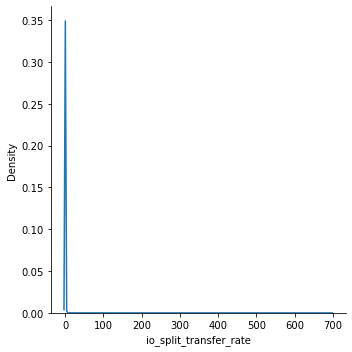

In [28]:
sns.displot(data, x="io_split_transfer_rate", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)

In [29]:
for i in range(90,100):
    var =data["io_split_transfer_rate"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.07
100 percentile value is  695.0


In [30]:
var =data["io_split_transfer_rate"].values
var = np.sort(var,axis = None)
print(var[-300:])

[110.33 110.37 111.2  111.97 112.28 113.48 113.7  114.18 114.62 114.63
 114.67 114.82 114.82 114.92 114.93 115.25 115.92 115.98 116.02 116.05
 116.42 116.72 116.82 116.9  117.15 117.33 117.45 118.13 118.23 118.37
 119.47 120.32 120.8  120.82 121.25 121.35 121.52 121.6  122.33 122.7
 122.83 123.25 123.9  123.95 124.02 124.1  124.95 125.32 125.65 126.37
 127.48 128.47 128.52 128.82 129.32 129.52 130.3  130.32 130.57 131.63
 132.65 133.18 134.23 134.4  135.3  135.3  135.32 135.45 135.87 135.88
 136.02 136.1  136.27 137.28 137.37 140.32 140.43 140.48 140.73 140.88
 141.2  141.2  141.32 141.95 142.   142.98 143.18 143.3  143.6  143.77
 143.78 144.45 144.7  145.4  145.45 145.87 145.9  146.75 147.5  147.73
 148.58 150.42 151.12 151.48 154.97 156.43 156.52 156.62 156.95 157.07
 157.5  157.97 158.03 159.82 160.07 160.17 160.48 161.2  161.75 162.32
 162.52 163.23 163.28 163.6  163.6  163.93 164.87 165.98 166.3  166.73
 166.88 167.27 167.37 167.9  168.32 169.97 171.13 171.45 172.8  172.98
 173.47

In [31]:
data = data[data['io_split_transfer_rate'] < 550]
data.shape

(119774, 87)

[ 1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
  1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.

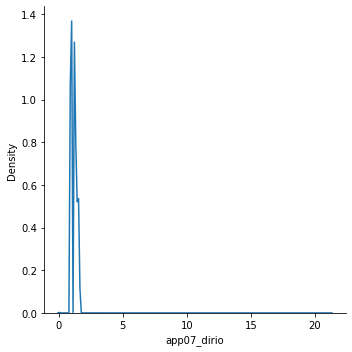

In [32]:
sns.displot(data, x="app07_dirio", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app07_dirio"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [33]:
data = data[data['app07_dirio'] < 8]
data.shape

(119773, 87)

[ 649.33  649.4   649.4   649.4   649.67  649.73  649.8   649.98  650.37
  650.47  650.53  650.9   650.95  651.23  651.73  652.5   652.6   652.7
  652.8   652.87  653.    653.13  653.2   653.23  653.27  653.4   653.57
  653.97  654.1   654.23  654.27  654.33  654.47  654.63  654.63  654.73
  654.77  654.97  655.13  655.17  655.2   655.33  655.5   655.67  656.
  656.13  656.23  656.33  656.57  656.6   656.67  657.08  657.1   657.47
  657.53  657.63  657.7   657.75  658.    658.07  658.17  658.9   659.23
  659.4   659.63  659.63  659.73  660.1   660.13  660.37  661.13  661.2
  661.33  661.53  661.67  661.9   662.1   662.27  662.3   662.62  662.7
  662.73  663.07  663.1   663.23  663.23  663.5   663.67  663.77  663.8
  663.83  664.47  664.47  664.9   664.97  665.07  665.2   665.63  665.7
  665.83  666.23  666.33  666.47  666.63  667.82  668.    668.18  668.93
  669.27  669.5   669.6   669.67  669.87  669.97  670.57  670.67  670.68
  670.77  671.77  671.83  672.3   672.33  672.37  672.53  

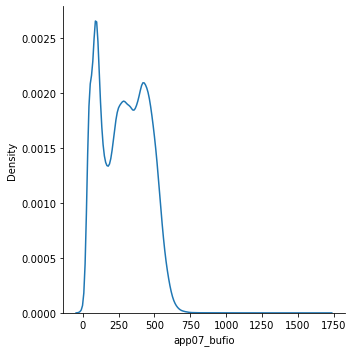

In [34]:
sns.displot(data, x="app07_bufio", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app07_bufio"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [35]:
data = data[data['app07_bufio'] < 1500]
data.shape

(119772, 87)

[ 7.12  7.12  7.12  7.13  7.15  7.15  7.17  7.18  7.18  7.2   7.22  7.22
  7.23  7.25  7.25  7.27  7.28  7.3   7.32  7.33  7.37  7.37  7.38  7.38
  7.38  7.38  7.42  7.43  7.43  7.45  7.45  7.45  7.47  7.48  7.48  7.48
  7.5   7.5   7.5   7.5   7.52  7.52  7.53  7.53  7.55  7.55  7.58  7.6
  7.62  7.62  7.62  7.67  7.68  7.68  7.7   7.7   7.7   7.73  7.73  7.75
  7.77  7.78  7.8   7.83  7.85  7.85  7.88  7.88  7.9   7.92  7.92  7.92
  7.93  7.95  7.97  7.97  7.98  8.    8.05  8.05  8.08  8.08  8.08  8.1
  8.1   8.12  8.12  8.12  8.13  8.15  8.15  8.17  8.18  8.2   8.22  8.22
  8.25  8.25  8.27  8.27  8.28  8.3   8.32  8.33  8.35  8.35  8.35  8.37
  8.37  8.37  8.37  8.38  8.4   8.43  8.43  8.45  8.47  8.47  8.5   8.52
  8.52  8.55  8.57  8.6   8.6   8.6   8.62  8.65  8.65  8.65  8.65  8.68
  8.7   8.73  8.77  8.77  8.78  8.8   8.82  8.83  8.83  8.85  8.88  8.93
  8.93  8.93  8.95  8.95  8.97  8.98  9.    9.    9.    9.02  9.02  9.03
  9.07  9.1   9.1   9.18  9.18  9.2   9.22  9.23  9.2

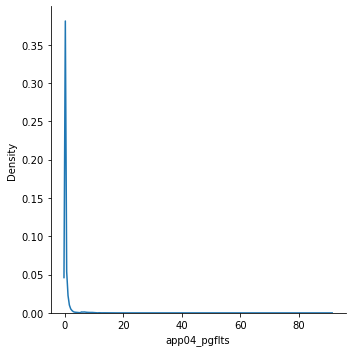

In [36]:
sns.displot(data, x="app04_pgflts", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app04_pgflts"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [37]:
data = data[data['app04_pgflts'] < 70]
data.shape

(119770, 87)

[ 17.83  17.83  17.87  17.87  17.87  17.88  17.92  17.93  17.97  17.98
  18.02  18.03  18.03  18.07  18.07  18.07  18.08  18.1   18.1   18.1
  18.12  18.13  18.15  18.17  18.17  18.17  18.18  18.18  18.2   18.2
  18.23  18.23  18.23  18.23  18.25  18.25  18.27  18.28  18.3   18.3
  18.32  18.33  18.35  18.37  18.38  18.43  18.43  18.45  18.47  18.48
  18.48  18.5   18.53  18.53  18.58  18.58  18.6   18.62  18.63  18.65
  18.68  18.68  18.7   18.72  18.73  18.8   18.8   18.82  18.83  18.85
  18.87  18.88  18.88  18.9   18.92  18.92  18.93  18.93  18.95  18.97
  18.97  18.97  18.97  18.97  18.98  19.    19.02  19.03  19.05  19.05
  19.07  19.15  19.17  19.18  19.2   19.25  19.25  19.25  19.28  19.32
  19.35  19.38  19.38  19.4   19.47  19.52  19.52  19.58  19.58  19.6
  19.65  19.72  19.75  19.75  19.77  19.85  19.85  19.88  19.88  19.95
  19.98  19.98  20.02  20.03  20.08  20.1   20.15  20.15  20.18  20.2
  20.22  20.27  20.37  20.38  20.4   20.55  20.58  20.7   20.77  20.78
  20.8   20

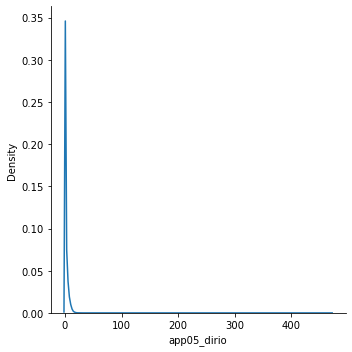

In [38]:
sns.displot(data, x="app05_dirio", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app05_dirio"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [39]:
data = data[data['app05_dirio'] < 300]
data.shape

(119766, 87)

[ 289.32  289.47  289.5   289.53  289.58  289.6   289.8   289.85  289.9
  289.93  290.2   290.22  290.32  290.33  290.4   290.78  290.82  290.83
  290.85  290.88  291.02  291.12  291.17  291.52  291.7   292.05  292.12
  292.2   292.35  292.35  292.42  292.45  292.48  292.5   292.5   293.07
  293.1   293.33  293.38  293.72  293.82  294.05  294.13  294.33  294.37
  294.63  294.85  295.    295.03  295.05  295.07  295.33  295.45  295.52
  296.22  296.68  296.85  296.87  296.88  296.95  296.95  297.02  297.03
  297.08  297.22  297.73  297.75  297.82  298.02  298.38  298.7   298.75
  298.88  299.42  299.55  299.65  299.73  299.73  300.13  300.13  300.27
  300.3   300.45  300.95  301.02  301.02  301.07  301.12  301.17  301.45
  301.92  301.93  302.17  302.18  302.45  302.63  302.98  303.4   303.88
  304.1   304.15  304.18  304.52  305.23  305.37  305.53  305.7   305.88
  306.37  306.68  307.17  307.27  307.32  307.78  307.93  308.18  308.7
  308.72  309.97  311.08  311.13  313.1   315.53  315

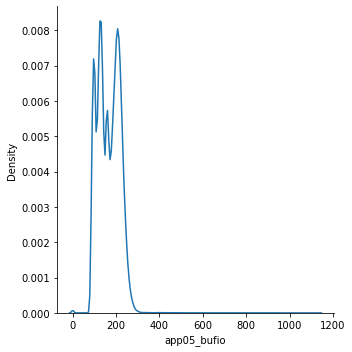

In [40]:
sns.displot(data, x="app05_bufio", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app05_bufio"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [41]:
data = data[data['app05_bufio'] < 950]
data.shape

(119765, 87)

[  9.35  10.12  10.3   10.3   10.3   10.32  10.32  10.32  10.32  10.32
  10.32  10.32  10.32  10.32  10.32  10.32  10.32  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33  10.33
  10.33  10.33  10.33  10.33  10.33  10.35  10.35  10.35  10.35  10.35
  10.35  10.35  10.35  10.35  10.35  10.35  10.37  10.37  10.37  10.37
  10.37  10.37  10.37  10.37  10.38  10.4   10.62  11.    11.    11.
  11.    11.    11.    11.    11.    11.    11.    11.    11.    11.
  11.    11.    11.    11.    11.    11.    11.    11.    11.    11.
  11.    11.33  11.35  11.35  11.35  11.35  11.35  11.35  11.37  11.37
  11.37  11.

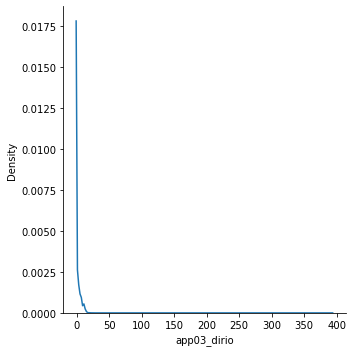

In [42]:
sns.displot(data, x="app03_dirio", kind="kde")
# sns.violinplot(y="syst_process_count", data =data)
var =data["app03_dirio"].values
var = np.sort(var,axis = None)
print(var[-300:])

In [43]:
data = data[data['app03_dirio'] < 300]
data.shape

(119761, 87)

In [44]:
data.columns

Index(['syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts',
       'app0

##### Outliers Clearance
before cleaning there were 119782 and after removal of outliers there are 119761 rows so there are 21 rows which were having outliers

In [46]:
features = data.drop(['cpu_load'], axis = 1)
true_labels = data['cpu_load']
X,x_test, Y, y_test = train_test_split(features, true_labels, test_size = 0.2,stratify = true_labels, random_state = 42)

print('---------------------------------------------------')
print('Test size ', x_test.shape, ' ', y_test.shape)
print('---------------------------------------------------')
print('Training size ', X.shape, ' ', Y.shape)
print('---------------------------------------------------')

---------------------------------------------------
Test size  (23953, 86)   (23953,)
---------------------------------------------------
Training size  (95808, 86)   (95808,)
---------------------------------------------------


In [47]:
label_dict = {'high':[1, 0, 0], 'low':[0,1,0], 'medium':[0, 0, 1]}
y_test_one_hot = one_hot_builder(label_dict, y_test)

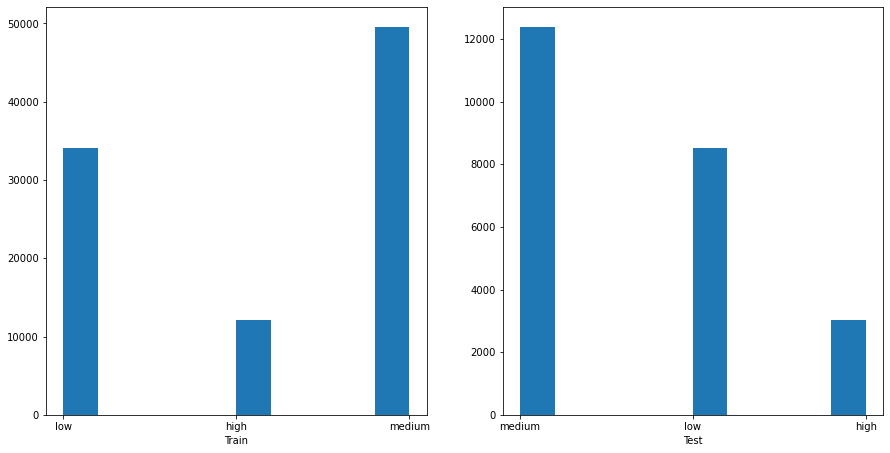

In [212]:
# checking distribution of train and test

plt.figure(figsize = (15, 7.5))
plt.subplot(1,2,1)
plt.hist(Y)
plt.xlabel('Train')



plt.subplot(1,2,2)
plt.hist(y_test)
plt.xlabel('Test')

plt.show()

In [213]:
X.shape

(95808, 86)

### The data has been splited correctly

###### Note:- The hyperparameter tuning can be done through the grid search CV but it requires much more computation power that's why I opted for 80:20 rule

In [214]:
%%time
n_estimators = [50, 100, 250, 500, 750, 1000]

for n in n_estimators:
    random_forest = RandomForestClassifier(criterion = 'entropy', random_state = 42,max_features = 0.7,n_estimators = n, n_jobs=-1).fit(X,Y)
    y_test_pred = random_forest.predict(x_test)
    y_test_prob = random_forest.predict_proba(x_test)
    print('f1 score is ', f1_score(y_test, y_test_pred, average = 'weighted'), ' with n_estimators ', n, ' log loss is ', log_loss(y_test_one_hot, y_test_prob))

f1 score is  0.9130784100713059  with n_estimators  50  log loss is  0.27161395269470545
f1 score is  0.9126681023402796  with n_estimators  100  log loss is  0.2395147506868701
f1 score is  0.9133816743360819  with n_estimators  250  log loss is  0.21744604921769137
f1 score is  0.9130191264611247  with n_estimators  500  log loss is  0.21130630735511954
f1 score is  0.9132728957104693  with n_estimators  750  log loss is  0.20879596886202167
f1 score is  0.9133212422534883  with n_estimators  1000  log loss is  0.20878577315002778
Wall time: 56min 33s


In [215]:
random_forest = RandomForestClassifier(criterion = 'entropy', random_state = 42,max_features = 0.7,n_estimators = 1000, n_jobs=-1).fit(features, true_labels)

In [216]:
test = pd.read_csv('test.csv')
test_predict = random_forest.predict_proba(test.drop(['id', 'm_id'], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Random Forest entropy Final.csv', index = False)

In [217]:
# saving the model
filename = 'random_forest_tuned_without_features_selection_final.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [219]:
print('done')

done


###### Feature Selection

I got the idea from this kaggle blog https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

In [62]:
feature_scores = pd.Series(random_forest.feature_importances_, index=features.columns).sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
   display(feature_scores)

syst_buffered_ipo_rate          0.309909
syst_direct_ipo_rate            0.181840
app07_bufio                     0.150475
io_logical_name_trans           0.065252
page_modified_list_size         0.026030
app05_bufio                     0.018048
lla0_pkts_sentpsec              0.015841
app05_dirio                     0.013326
app05_pagesproc                 0.012623
lla0_pkts_recvpsec              0.010915
llb0_pkts_recvpsec              0.010463
page_free_list_size             0.010444
ewc0_pkts_recvpsec              0.009435
llb0_pkts_sentpsec              0.009305
ewc0_pkts_sentpsec              0.009066
ewd0_pkts_sentpsec              0.009031
ewd0_pkts_recvpsec              0.008763
app02_bufio                     0.007857
app02_dirio                     0.007818
io_page_writes                  0.006949
io_file_open_rate               0.006588
app05_pagesgbl                  0.006540
io_mailbox_write_rate           0.005871
page_page_write_ipo_rate        0.005449
app08_pagesproc 

In [54]:
features_selected = features.drop(['app03_bufio', 'state_mwait' ,'app01_proccount' ,'app08_pgflts' ,'app06_pagesgbl'  ,'state_cur'       ,'app02_proccount' ,'app01_pgflts'    ,'app05_proccount', 'app02_pgflts'    ,'app04_proccount' ,'app06_dirio'     ,'app06_bufio'     ,'app06_pgflts'    ,'app06_proccount' ,'app03_proccount' ],axis=1)


   


In [93]:

X,x_test, Y, y_test = train_test_split(features_selected, true_labels, test_size = 0.2,stratify = true_labels, random_state = 42)

print('---------------------------------------------------')
print('Test size ', x_test.shape, ' ', y_test.shape)
print('---------------------------------------------------')
print('Training size ', X.shape, ' ', Y.shape)
print('---------------------------------------------------')

---------------------------------------------------
Test size  (23953, 70)   (23953,)
---------------------------------------------------
Training size  (95808, 70)   (95808,)
---------------------------------------------------


In [218]:
%%time
n_estimators = [50, 100, 250, 500, 750, 1000]
for n in n_estimators:
    random_forest_feature_selected = RandomForestClassifier(criterion = 'entropy', random_state = 42,max_features = 25,n_estimators = n, n_jobs=-1).fit(X, Y)
    y_test_pred = random_forest_feature_selected.predict(x_test)
    y_test_prob = random_forest_feature_selected.predict_proba(x_test)
    print('f1 score is ', f1_score(y_test, y_test_pred, average = 'weighted'), ' with n_estimators ', n, ' log loss is ', log_loss(y_test_one_hot, y_test_prob))

f1 score is  0.9117994149829656  with n_estimators  50  log loss is  0.2636053491261484
f1 score is  0.9135980624371989  with n_estimators  100  log loss is  0.2330915154341178
f1 score is  0.9136475688314666  with n_estimators  250  log loss is  0.21533401628424026
f1 score is  0.913645968007257  with n_estimators  500  log loss is  0.21375752729188804
f1 score is  0.9137941994321527  with n_estimators  750  log loss is  0.2087566029700319
f1 score is  0.9138345023272195  with n_estimators  1000  log loss is  0.20855659854062536
Wall time: 29min 34s


In [220]:
random_forest_feature_selected = RandomForestClassifier(criterion = 'entropy', random_state = 42,max_features = 25,n_estimators = 1000, n_jobs=-1).fit(features_selected, true_labels)

In [221]:
test = pd.read_csv('test.csv')
test_predict = random_forest_feature_selected.predict_proba(test.drop(['id', 'm_id','app03_bufio', 'state_mwait' ,'app01_proccount' ,'app08_pgflts' ,'app06_pagesgbl'  ,'state_cur'       ,'app02_proccount' ,'app01_pgflts'    ,'app05_proccount', 'app02_pgflts'    ,'app04_proccount' ,'app06_dirio'     ,'app06_bufio'     ,'app06_pgflts'    ,'app06_proccount' ,'app03_proccount' ], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Random Forest entropy feature_selected.csv', index = False)

In [222]:
# saving the model
filename = 'random_forest_tuned_with_fe.sav'
pickle.dump(random_forest_feature_selected, open(filename, 'wb'))

###### Gradient Boosting

In [223]:
%%time
gbdt = GradientBoostingClassifier(n_estimators=1000).fit(X, Y)
y_test_pred = gbdt.predict(x_test)
y_test_prob = gbdt.predict_proba(x_test)


Wall time: 1h 7min 57s


In [224]:
test = pd.read_csv('test.csv')
test_predict = gbdt.predict_proba(test.drop(['id', 'm_id'], axis = 1))

gbdt_dataframe = pd.DataFrame(test_predict)
gbdt_dataframe.columns = ['high', 'low', 'medium']
gbdt_dataframe['id'] = test['id'].values
gbdt_dataframe.to_csv('Gradient Boosting Final.csv', index = False)

In [225]:
filename = 'GBDT.sav'
pickle.dump(gbdt, open(filename, 'wb'))

### Voting Classifier

In [49]:
%%time
random_voting = RandomForestClassifier(criterion = 'entropy', random_state = 42,max_features = 25,n_estimators = 1000, n_jobs=-1)
gbdt_voting = GradientBoostingClassifier(n_estimators=1000)

vote = VotingClassifier(estimators=[('RF', random_voting), ('gbdt', gbdt_voting)], voting='soft')

vote.fit(features_selected, true_labels)


CPU times: user 66 µs, sys: 1e+03 ns, total: 67 µs
Wall time: 69.9 µs


In [163]:
test_predict = vote.predict_proba(test.drop(['id','app03_bufio', 'state_mwait' ,'app01_proccount' ,'app08_pgflts' ,'app06_pagesgbl'  ,'state_cur'       ,'app02_proccount' ,'app01_pgflts'    ,'app05_proccount', 'app02_pgflts'    ,'app04_proccount' ,'app06_dirio'     ,'app06_bufio'     ,'app06_pgflts'    ,'app06_proccount' ,'app03_proccount' ], axis = 1))

Voting_classifier = pd.DataFrame(test_predict)
Voting_classifier.columns = ['high', 'low', 'medium']
Voting_classifier['id'] = test['id'].values
Voting_classifier.to_csv('Voting_Classifier.csv', index = False)

In [157]:
features.columns

Index(['syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts',
       'app0

In [159]:
test.columns

Index(['id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts',
      

In [160]:
features.shape

(119761, 86)

In [162]:
for col in test.columns:
    if 'm_id' in col:
        test = test.drop([col], axis = 1)
        
test.shape

(58998, 87)

In [165]:
filename = 'VotingClassifier_random_gbt_1000.sav'
pickle.dump(vote, open(filename, 'wb'))

#### Two stack Voting Classifier 
hyperparameter found on my various others notebook

In [50]:
%%time
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0, n_jobs=-1,max_features=30,max_depth=18)
gbdt = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,min_samples_split=1200,max_depth=11,max_features=12,learning_rate=0.05,subsample=0.85)

voted = VotingClassifier(estimators=[('rf', rf), ('gbdt', gbdt), ('vote_1', vote)],voting='soft')

voted.fit(features, true_labels)

CPU times: user 50min 40s, sys: 23.4 s, total: 51min 3s
Wall time: 55min 53s


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     max_features=30,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=11,
                                                         max_features=12,
                                                         min_samples_split=1200,
                                                         n_estimators=1000,
                                                         random_state=42,
                                                       

In [52]:
filename = 'VotingClassifier_random_2_stack_no_fs.sav'
pickle.dump(voted, open(filename, 'wb'))

In [53]:
test = pd.read_csv('test.csv')
test_predict = voted.predict_proba(test.drop(['id', 'm_id'], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Voting_2_stack_no_fs.csv', index = False)

In [51]:
print('done')

done


#### Two stack Voting Classifier with feature selection
hyperparameter found on my various others notebook

In [57]:
%%time
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0, n_jobs=-1,max_features=30,max_depth=18)
gbdt = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,min_samples_split=1200,max_depth=11,max_features=12,learning_rate=0.05,subsample=0.85)

voted_fs = VotingClassifier(estimators=[('rf', rf), ('gbdt', gbdt), ('vote_1', vote)],voting='soft')

voted_fs.fit(features_selected, true_labels)

CPU times: user 51min 27s, sys: 25.4 s, total: 51min 52s
Wall time: 56min 36s


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     max_features=30,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=11,
                                                         max_features=12,
                                                         min_samples_split=1200,
                                                         n_estimators=1000,
                                                         random_state=42,
                                                       

In [59]:
test_predict = voted_fs.predict_proba(test.drop(['id','m_id','app03_bufio', 'state_mwait' ,'app01_proccount' ,'app08_pgflts' ,'app06_pagesgbl'  ,'state_cur'       ,'app02_proccount' ,'app01_pgflts'    ,'app05_proccount', 'app02_pgflts'    ,'app04_proccount' ,'app06_dirio'     ,'app06_bufio'     ,'app06_pgflts'    ,'app06_proccount' ,'app03_proccount' ], axis = 1))

Voting_classifier = pd.DataFrame(test_predict)
Voting_classifier.columns = ['high', 'low', 'medium']
Voting_classifier['id'] = test['id'].values
Voting_classifier.to_csv('Voting_Classifier_2_stack_with_fs.csv', index = False)

In [60]:
print('done')

done


In [61]:
filename = 'VotingClassifier_random_2_stack_with_fs.sav'
pickle.dump(voted_fs, open(filename, 'wb'))

#### Voting Classifier with proper hyperparameter tuning done on different tree
hyperparameter found on my various others notebook

In [62]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0, n_jobs=-1,max_features=30,max_depth=18)
gbdt = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,min_samples_split=1200,max_depth=11,max_features=12,learning_rate=0.05,subsample=0.85)

voted = VotingClassifier(estimators=[('rf', rf), ('gbdt', gbdt)],voting='soft')
voted.fit(features, true_labels)

CPU times: user 16min 46s, sys: 15.1 s, total: 17min 1s
Wall time: 19min 26s


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     max_features=30,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=11,
                                                         max_features=12,
                                                         min_samples_split=1200,
                                                         n_estimators=1000,
                                                         random_state=42,
                                                       

In [63]:
test = pd.read_csv('test.csv')
test_predict = voted.predict_proba(test.drop(['id', 'm_id'], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Voting_1_stack_no_fs.csv', index = False)

In [64]:
filename = 'VotingClassifier_random_1j_stack_with_fs.sav'
pickle.dump(voted, open(filename, 'wb'))

#### Three Model Voting Classifier 
hyperparameter found on my various others notebook 

###### V1

In [ ]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0, n_jobs=-1,max_features=30,max_depth=18)
gbdt = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,min_samples_split=1200,max_depth=11,max_features=12,learning_rate=0.05,subsample=0.85)
hist = HistGradientBoostingClassifier(learning_rate=0.05,early_stopping=False,l2_regularization=2,max_iter=750 ,max_depth=50,random_state=42)
voting_classifier = VotingClassifier(estimators=[
    ('gradient_boosting', gbdt),
    ('histboosting', hist),
    ('random_forest_classifier',rf)
],voting='soft',n_jobs=-1)

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(features, true_labels)

In [ ]:
test = pd.read_csv('test.csv')
test_predict = voting_classifier.predict_proba(test.drop(['id', 'm_id'], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Voting_3_stack_no_fs.csv', index = False)

#### Three Model Voting Classifier 
hyperparameter found on my various others notebook 
###### V2

In [ ]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 750,max_depth=20,max_features=28,n_jobs=-1,verbose=1)
gbdt = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,min_samples_split=1200,max_depth=11,max_features=12,learning_rate=0.05,subsample=0.85)
hist = HistGradientBoostingClassifier(learning_rate=0.05,early_stopping=False,l2_regularization=2,max_iter=750 ,max_depth=50,random_state=42)
voting_classifier = VotingClassifier(estimators=[
    ('gradient_boosting', gbdt),
    ('histboosting', hist),
    ('random_forest_classifier',rf)
],voting='soft',n_jobs=-1)

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(features, true_labels)

In [ ]:
test = pd.read_csv('test.csv')
test_predict = voting_classifier.predict_proba(test.drop(['id', 'm_id'], axis = 1))

random_forest_pred = pd.DataFrame(test_predict)
random_forest_pred.columns = ['high', 'low', 'medium']
random_forest_pred['id'] = test['id'].values
random_forest_pred.to_csv('Voting_3_stack_no_fs_v2.csv', index = False)

#### Documentation

1. I had tried feature binning, derivative features and normal outlier removal got the best solution from outlier clearance
2. I had done hyperparameter tuning on all of these models 
3. I had boosted score by using 2 stack Voting Classifier with different param
4. I had boosted score by using 4 models in Voting Classifier with different param
5. The score is again boosted by taking mean of two best score and the reulting score log loss decreased significantly

**Creative approach**
1. Two stack Voting Classifier
2. Mean average of two best model output decreased the logloss significantly

# Creative Solutions

**Idea behind the solution**:- I thought of them to make a cluster of kmeans and then to check wheather all of the clusters are falling on the class with similar values

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier  
from prettytable import PrettyTable
from sklearn import tree
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('train.csv')
labels = data['cpu_load']
data = data.drop(['m_id', 'cpu_load'], axis = 1)


In [3]:
means = KMeans(n_clusters=3, random_state=1, init = 'k-means++').fit(data)

In [4]:
kmean_label = means.predict(data)

In [5]:
data['kmean_label'] = kmean_label


In [6]:
result = dict()
for x, y in zip(kmean_label, labels.values):
    try:
        result[str(x) + '_' + y] += 1
    except:
        result[str(x) + '_' + y] = 1
result

{'0_medium': 61993,
 '0_low': 42583,
 '0_high': 15162,
 '2_high': 4,
 '2_low': 5,
 '1_low': 7,
 '1_medium': 11,
 '1_high': 5,
 '2_medium': 12}

#### Observation :- The approach didn't work as I thought so